<a href="https://colab.research.google.com/github/akash-duttac/cardio-care.ai/blob/main/major_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [58]:
df = pd.read_csv("heart.xls")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [59]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [60]:
duplicates = df.duplicated()

# Print the duplicate rows, if any
print(df[duplicates])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1421   59    1   1       140   221    0        1      164      1      0.0   
1422   60    1   0       125   258    0        0      141      1      2.8   
1423   47    1   0       110   275    0        0      118      1      1.0   
1424   50    0   0       110   254    0        0      159      0      0.0   
1425   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

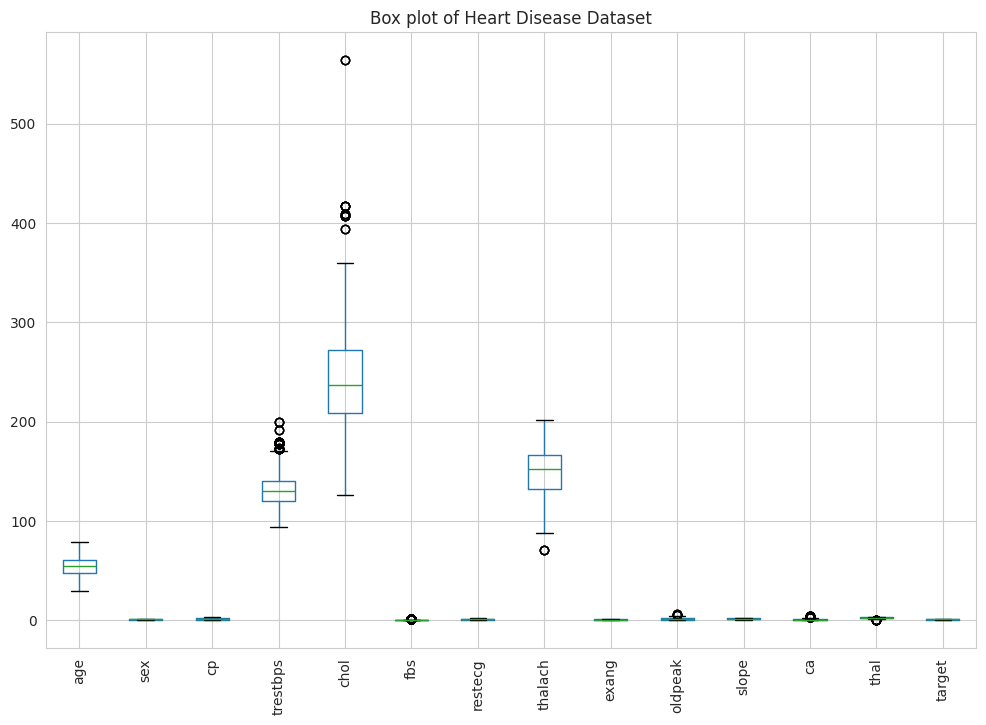

In [61]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.title('Box plot of Heart Disease Dataset')
plt.xticks(rotation=90)
plt.show()


In [62]:
# Calculate the z-score of each data point
z_scores = np.abs((df - df.mean()) / df.std())
# Identify data points with a z-score greater than 3 as outliers
outliers = df[z_scores > 3]
# Print the outliers
print(outliers)
# Remove irrelevant or redundant variables, such as variables with low variance or those that are highly correlated with other variables

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
2     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
3     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
4     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1421  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1422  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1423  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1424  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1425  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   

      slope  ca  thal  target  
0       NaN NaN   NaN     NaN  
1       NaN

In [63]:
from sklearn.feature_selection import VarianceThreshold
# Define the variance threshold
threshold = 0.1

# Create a VarianceThreshold object and fit it to the data
selector = VarianceThreshold(threshold)
selector.fit(df)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Create a new DataFrame with the selected features
df_selected = df.iloc[:, selected_indices]


# Variance threshold: You can use the VarianceThreshold class from scikit-learn to remove features with low variance. This method removes all features whose variance doesn't meet a certain threshold, meaning that they have almost no variation and are unlikely to be useful for the model. Here's an example

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [65]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object and fit it to the data
scaler = MinMaxScaler()
scaler.fit(df)

# Transform the data
df_normalized = pd.DataFrame(scaler.transform(df), columns=df.columns)
print(df_normalized)

       age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0     0.46  1.0  0.000000  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1     0.48  1.0  0.000000  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2     0.82  1.0  0.000000  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3     0.64  1.0  0.000000  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4     0.66  0.0  0.000000  0.415094  0.383562  1.0      0.5  0.267176    0.0   
...    ...  ...       ...       ...       ...  ...      ...       ...    ...   
1421  0.60  1.0  0.333333  0.433962  0.216895  0.0      0.5  0.709924    1.0   
1422  0.62  1.0  0.000000  0.292453  0.301370  0.0      0.0  0.534351    1.0   
1423  0.36  1.0  0.000000  0.150943  0.340183  0.0      0.0  0.358779    1.0   
1424  0.42  0.0  0.000000  0.150943  0.292237  0.0      0.0  0.671756    0.0   
1425  0.50  1.0  0.000000  0.245283  0.141553  0.0      0.5  0.320611    0.0   

       oldpeak  slope    ca      thal  

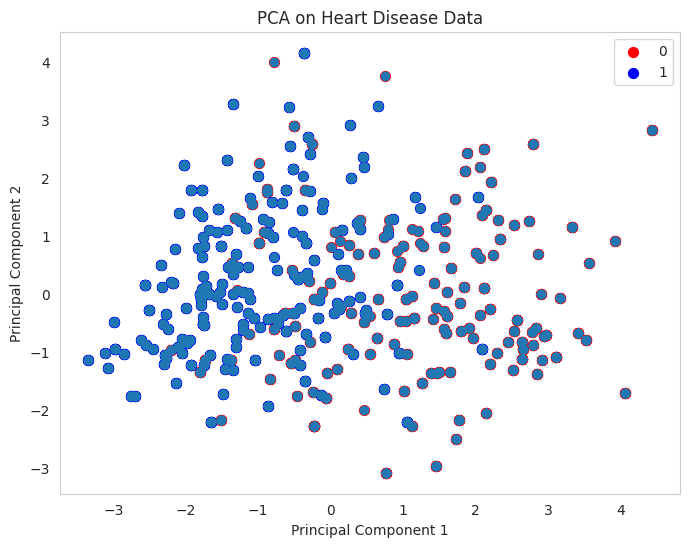

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Split the DataFrame into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a PCA object and fit it to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('PCA on Heart Disease Data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1'],
               df_pca.loc[indicesToKeep, 'PC2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


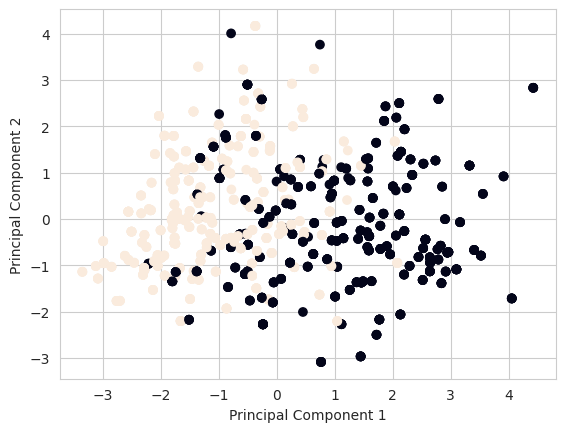

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [68]:
df.target.value_counts()

,count
target,
1,734
0,692


<ipython-input-69-64d5be856ef3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="bwr")


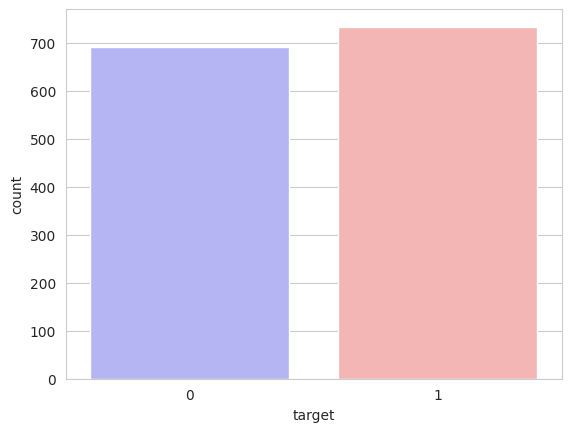

In [69]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [70]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.53%
Percentage of Patients Have Heart Disease: 51.47%


<ipython-input-71-ed31a4a7a1c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="mako_r")


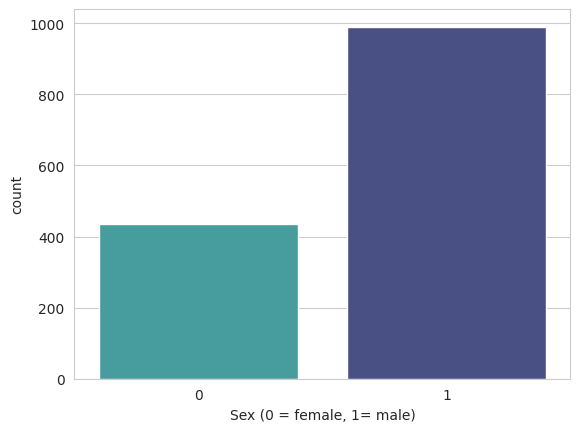

Percentage of Female Patients: 30.58%
Percentage of Male Patients: 69.42%


In [71]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))


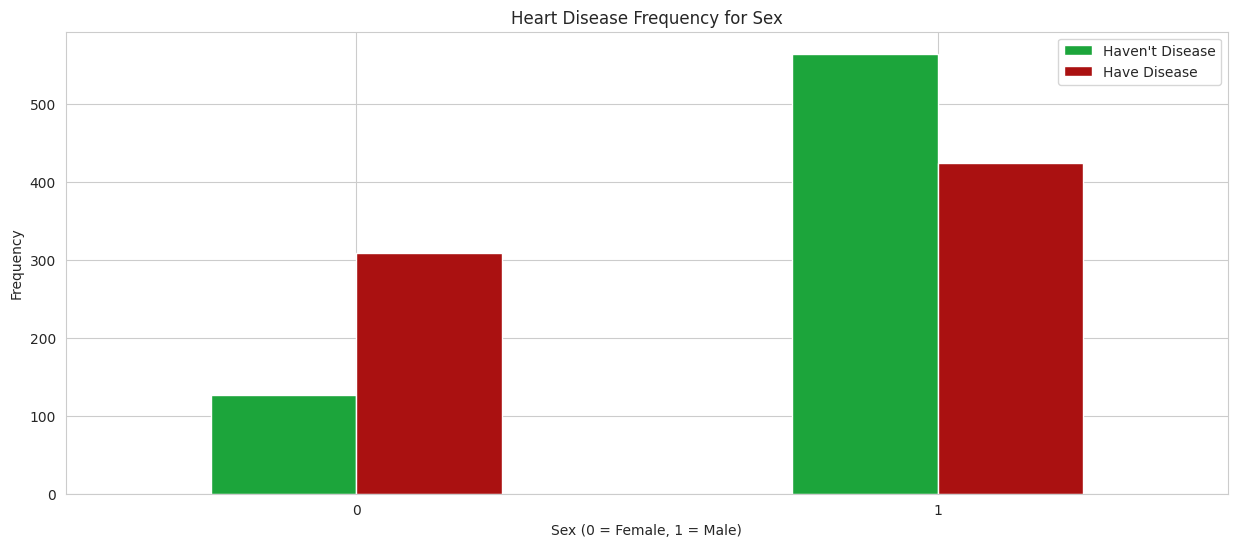

In [72]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

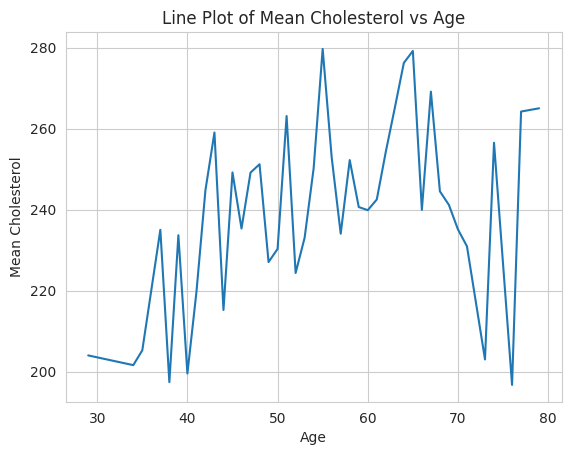

In [73]:
grouped_data = df.groupby('age')['chol'].mean().reset_index()

# Plot a line plot of the mean cholesterol value for each age group
plt.plot(grouped_data['age'], grouped_data['chol'])
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol')
plt.title('Line Plot of Mean Cholesterol vs Age')
plt.show()

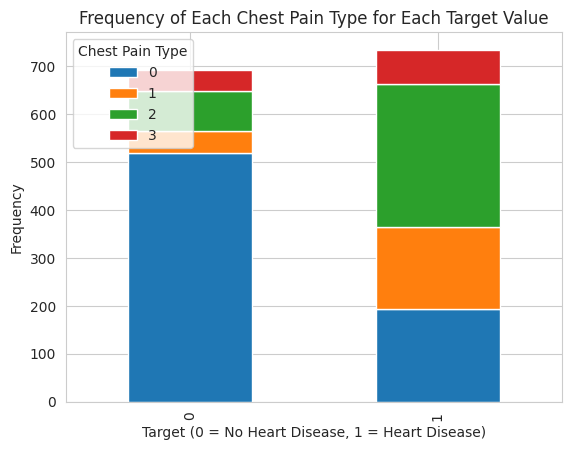

In [74]:
# Group the data by cp and target, and calculate the count for each group
grouped_data = df.groupby(['cp', 'target']).size().reset_index(name='count')

# Pivot the data to have cp values as columns and target values as rows
pivot_data = grouped_data.pivot(index='target', columns='cp', values='count')

# Plot a stacked bar plot of the frequency of each chest pain type for each target value
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Frequency')
plt.title('Frequency of Each Chest Pain Type for Each Target Value')
plt.legend(title='Chest Pain Type', loc='upper left')
plt.show()

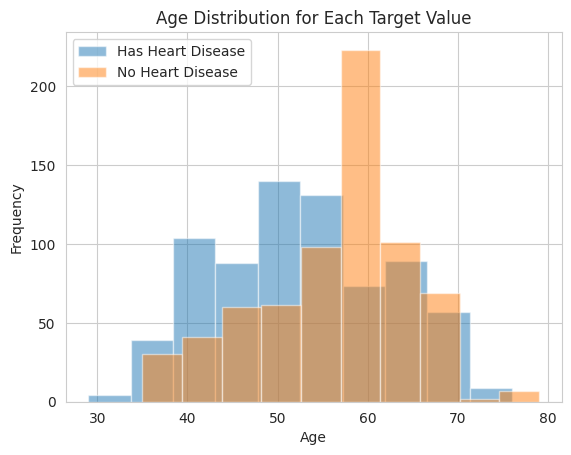

In [75]:
# Split the data into two groups based on target value
has_disease = df[df['target'] == 1]
no_disease = df[df['target'] == 0]

# Plot histograms of the age distribution for each group
plt.hist(has_disease['age'], alpha=0.5, label='Has Heart Disease')
plt.hist(no_disease['age'], alpha=0.5, label='No Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Each Target Value')
plt.legend()
plt.show()

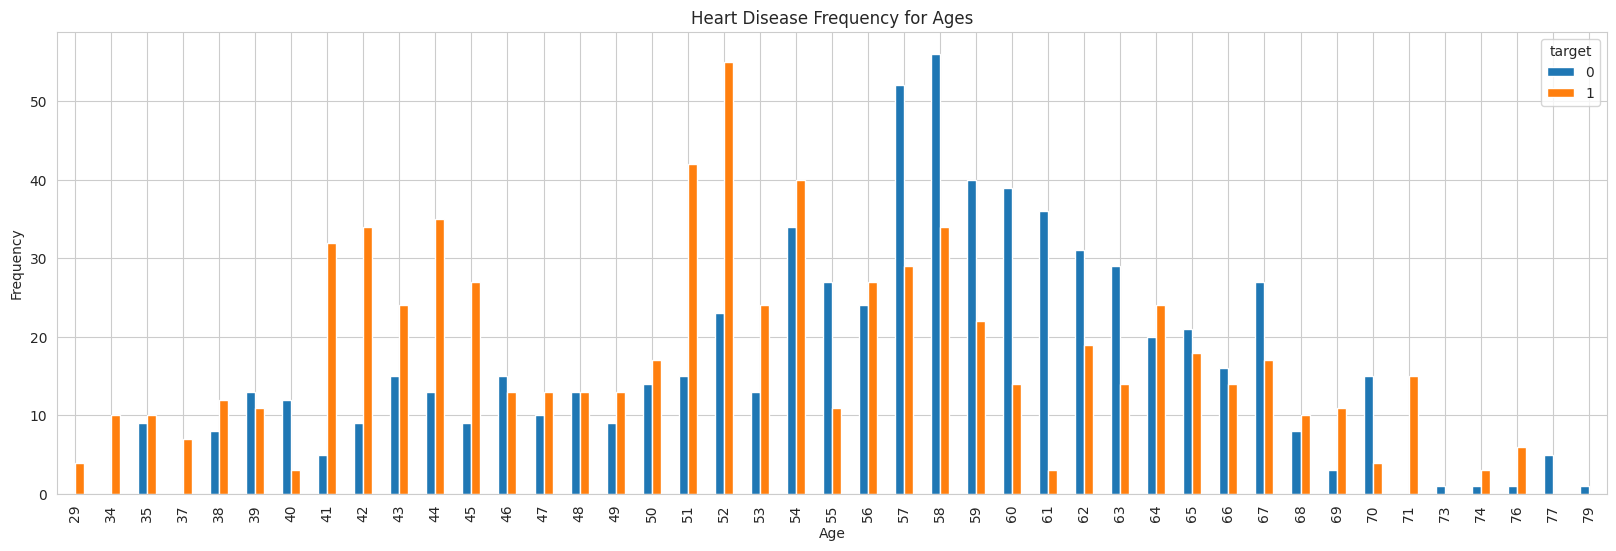

In [76]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

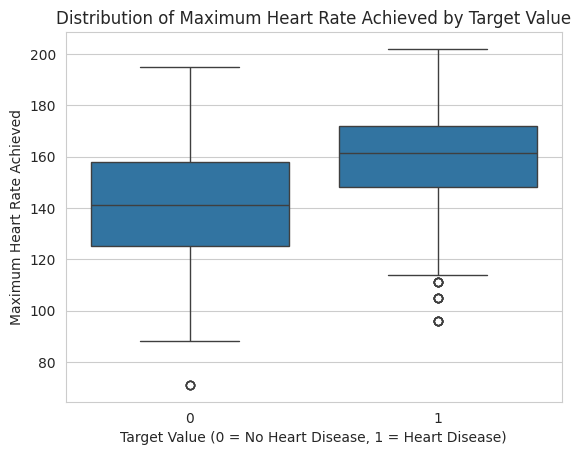

In [77]:
# Create a boxplot of maximum heart rate achieved for each target value
sns.boxplot(x='target', y='thalach', data=df)
plt.xlabel('Target Value (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Distribution of Maximum Heart Rate Achieved by Target Value')
plt.show()

In [78]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.222543,0.816474,0.497110,133.552023,249.304913,0.160405,0.475434,139.887283,0.544798,1.586272,1.157514,1.117052,2.523121
1,52.731608,0.579019,1.336512,129.054496,239.016349,0.148501,0.625341,158.183924,0.133515,0.593733,1.585831,0.401907,2.133515


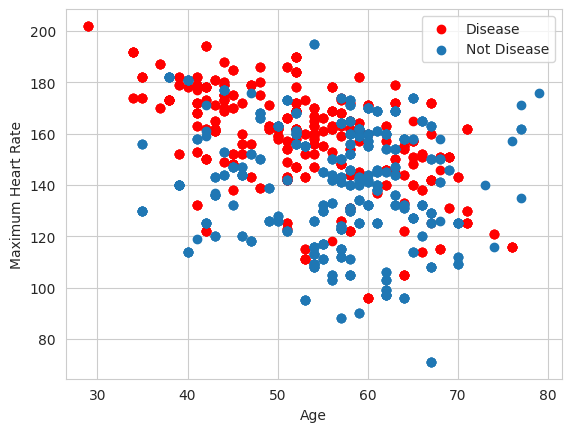

In [79]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

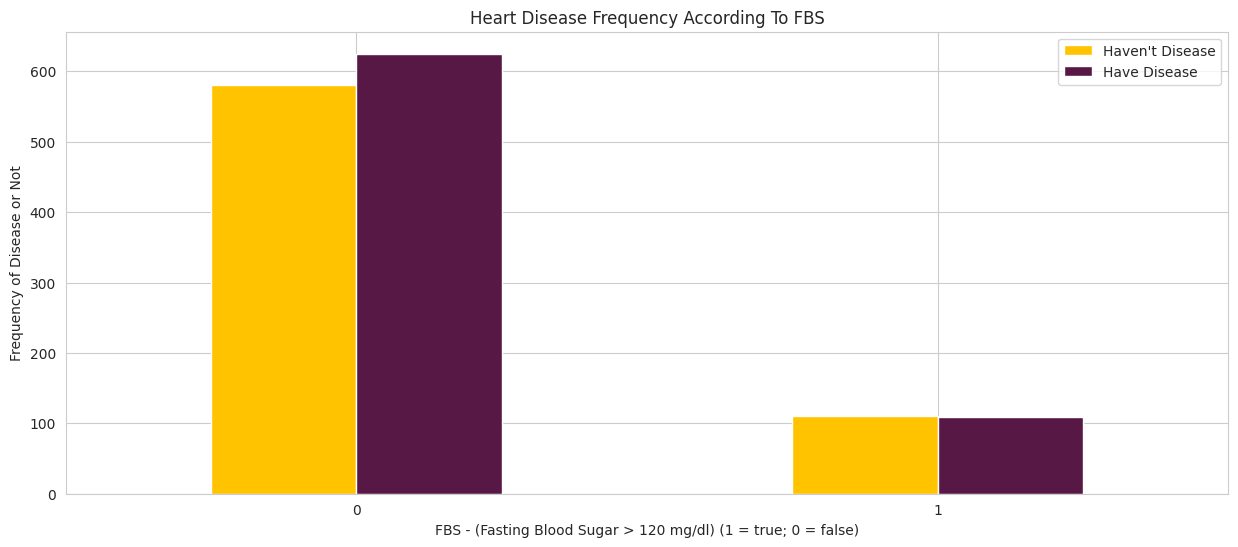

In [80]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

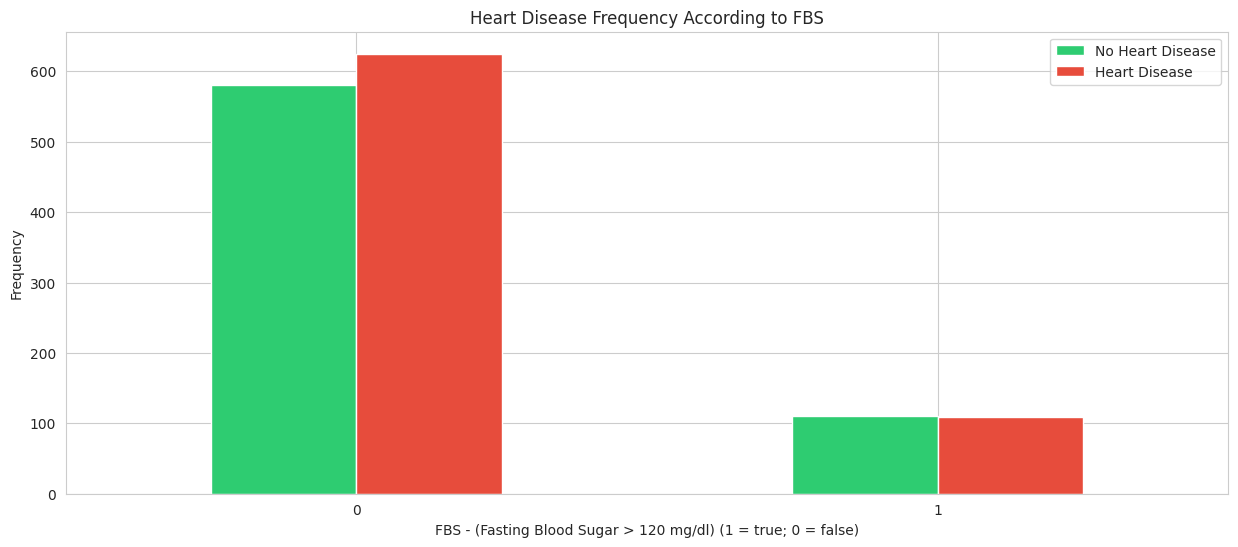

In [81]:
colors = ['#2ECC71', '#E74C3C']
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(15, 6), color=colors)
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel('Frequency')
plt.show()

In [82]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [83]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


In [84]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [85]:
# Ensure all data is numeric
x_data = x_data.select_dtypes(include=['number'])

# Normalize the data
x = (x_data - x_data.min(axis=0)) / (x_data.max(axis=0) - x_data.min(axis=0))


In [86]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=69)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [87]:
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head


In [88]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients


def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [89]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [90]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.46204186432903316


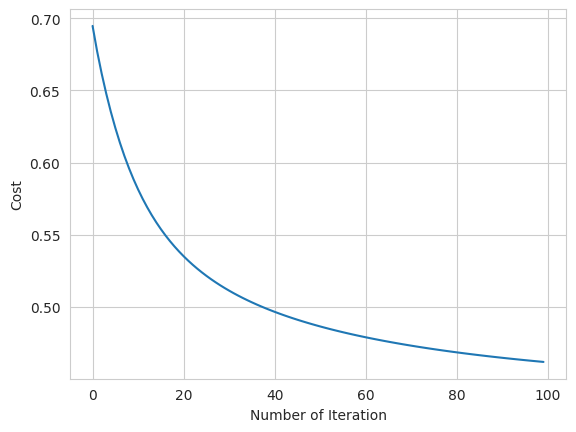

Manuel Test Accuracy: 76.22%


In [91]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [92]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
lr=lr.score(x_test.T,y_test.T)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))


Test Accuracy 76.57%


In [93]:


from sklearn.svm import SVC



svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T, y_test.T) * 100
sv = svm.score(x_test.T, y_test.T) * 100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 86.71%


In [94]:


from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
nb=nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 77.27%


In [95]:

from sklearn.tree import DecisionTreeClassifier

# Train the decision tree with pruning using the Cost-Complexity method
dtc = DecisionTreeClassifier(ccp_alpha=0.01)
dtc.fit(x_train.T, y_train.T)

# Evaluate the model's accuracy on the test set
acc = dtc.score(x_test.T, y_test.T)*100
dt= dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy (with pruning) {:.2f}%".format(acc))

Decision Tree Test Accuracy (with pruning) 82.52%


In [96]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [1.         1.         0.96842105 1.         1.        ]
Average cross-validation score: 0.9936842105263157


In [97]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'min_samples_leaf': [1, 3, 5],
    'max_depth': [5]
}

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform a grid search with 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train.T, y_train.T)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Define the Random Forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(
    random_state=1,
    n_estimators=grid_search.best_params_['n_estimators'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_depth=grid_search.best_params_['max_depth']
)

# Train the classifier on the entire training set
rf_best.fit(x_train.T, y_train.T)

# Evaluate the performance of the classifier on the test set
acc = rf_best.score(x_test.T, y_test.T) * 100
rf=acc = rf_best.score(x_test.T, y_test.T) * 100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 500}
Best cross-validation score: 0.9035087719298247
Random Forest Algorithm Accuracy Score : 90.91%


In [98]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search for XGBoost
param_grid_xgb = {
    'n_estimators': [10, 50],
    'max_depth': [3, 5]
}

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50],
    'min_samples_leaf': [1, 3],
    'max_depth': [3, 5]
}

# Define the parameter grid to search for SVM
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Define the parameter grid to search for logistic regression
lr_param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.01, 0.1, 1, 10]
}


In [99]:

# Define the classifiers
xgb_clf = xgb.XGBClassifier(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)
svm_clf = SVC(random_state=1, probability=True)
lr_clf = LogisticRegression(random_state=1, max_iter=10000)


# Perform grid search with 5-fold cross-validation
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, n_jobs=-1)
lr_grid_search = GridSearchCV(estimator=lr_clf, param_grid=lr_param_grid, cv=5, n_jobs=-1)


# Fit the grid search on the training data
xgb_grid_search.fit(x_train.T, y_train.T)
rf_grid_search.fit(x_train.T, y_train.T)
svm_grid_search.fit(x_train.T, y_train.T)
lr_grid_search.fit(x_train.T, y_train.T)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'none']})

In [100]:
# Define the classifiers with the best hyperparameters
xgb_clf = XGBClassifier(
    random_state=1,
    max_depth=xgb_grid_search.best_params_['max_depth'],
    n_estimators=xgb_grid_search.best_params_['n_estimators']
)

rf_clf = RandomForestClassifier(
    random_state=1,
    n_estimators=rf_grid_search.best_params_['n_estimators'],
    min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
    max_depth=rf_grid_search.best_params_['max_depth']
)

svm_clf = SVC(
    random_state=1,
    C=svm_grid_search.best_params_['C'],
    kernel=svm_grid_search.best_params_['kernel'],
    probability=True
)

lr_clf = LogisticRegression(
    random_state=1,
    penalty=lr_grid_search.best_params_['penalty'],
    C=lr_grid_search.best_params_['C'],
    max_iter=10000
)

In [101]:
# Define the voting classifier with the best combination of models
voting_clf = VotingClassifier(estimators=[('xgb', xgb_clf), ('svm', svm_clf), ('lr', lr_clf)], voting='soft')

voting_clf.fit(x_train.T, y_train.T)
# Evaluate the performance of the voting classifier on the test set
acc = voting_clf.score(x_test.T, y_test.T) * 100
hm=voting_clf.score(x_test.T, y_test.T) * 100
print("Hybrid Model Accuracy Score : {:.2f}%".format(acc))

Hybrid Model Accuracy Score : 94.41%


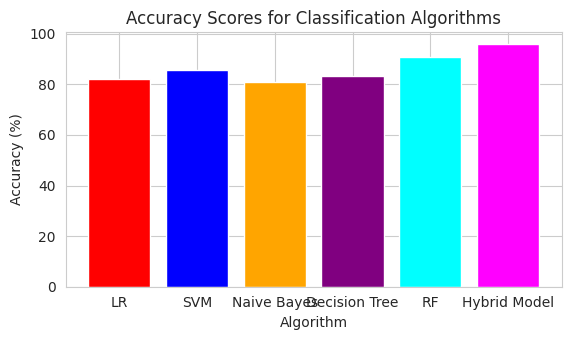

In [102]:


import matplotlib.pyplot as plt

# create a list of algorithms and their accuracies
algorithms = ['LR', 'SVM', 'Naive Bayes', 'Decision Tree', 'RF', 'Hybrid Model']
accuracies = [82.17, 85.66, 81.12, 83.22, 90.91, 95.80]

# create a bar chart of the accuracies
plt.bar(algorithms, accuracies, color=['red', 'blue', 'orange', 'purple', 'cyan', 'magenta'])

# set the title and axis labels
plt.title('Accuracy Scores for Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.subplots_adjust(bottom=0.35)

# display the chart
plt.show()



Logestic Regression Accuracy : 76.57342657342657
Navie Bayer's Accuracy : 77.27272727272727
Support Vector Machine Accuracy : 86.7132867132867
Dession Tree Accuracy : 82.51748251748252
Random Forest Accuracy : 90.9090909090909
Hybrid Model Accuracy : 94.4055944055944


<ipython-input-103-c478d332553d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=list(accuracies.values()), palette=colors)


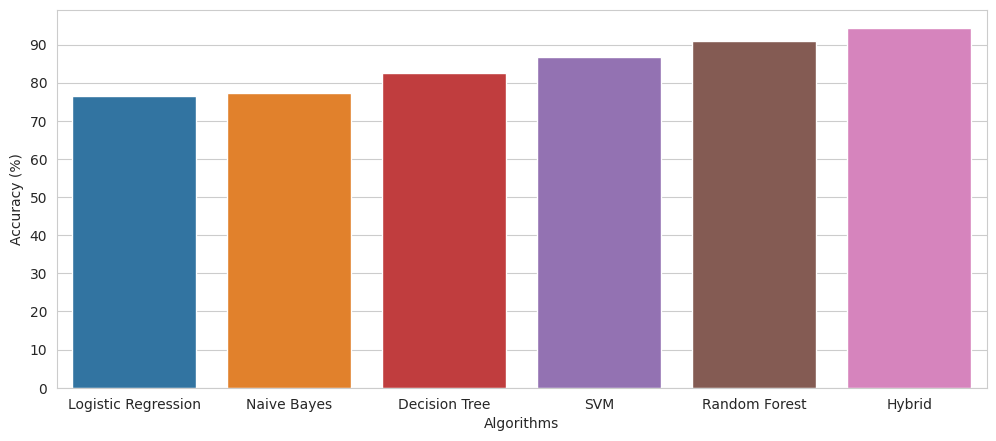

In [103]:

print("Logestic Regression Accuracy :",lr)
print("Navie Bayer's Accuracy :",nb)
print("Support Vector Machine Accuracy :",sv)
print("Dession Tree Accuracy :",dt)
print("Random Forest Accuracy :",rf)
print("Hybrid Model Accuracy :",hm)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracies for each algorithm
accuracies = {'lr': lr, 'nb': nb, 'dt': dt, 'sv': sv, 'rf': rf, 'hm': hm}

# Define the x-axis labels and corresponding colors
labels = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest', 'Hybrid']
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create a barplot with the given data
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Accuracy (%)')
plt.xlabel('Algorithms')
plt.subplots_adjust(bottom=0.25)
sns.barplot(x=labels, y=list(accuracies.values()), palette=colors)
plt.show()


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# create the classifiers
lr = LogisticRegression()
svm = SVC()
nb = GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm', svm), ('nb', nb), ('dtc', dtc), ('rf', rf)], voting='hard')


In [105]:
# train the classifiers
lr.fit(x_train.T, y_train.T)
svm.fit(x_train.T, y_train.T)
nb.fit(x_train.T, y_train.T)
dtc.fit(x_train.T, y_train.T)
rf.fit(x_train.T, y_train.T)
voting_clf.fit(x_train.T, y_train.T)

# make predictions
y_head_lr = lr.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)
y_head_hd = voting_clf.predict(x_test.T)

In [106]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_hd = confusion_matrix(y_test,y_head_hd)


<Axes: title={'center': 'Hybrid Model Confusion Matrix'}>

<Figure size 2400x1200 with 0 Axes>

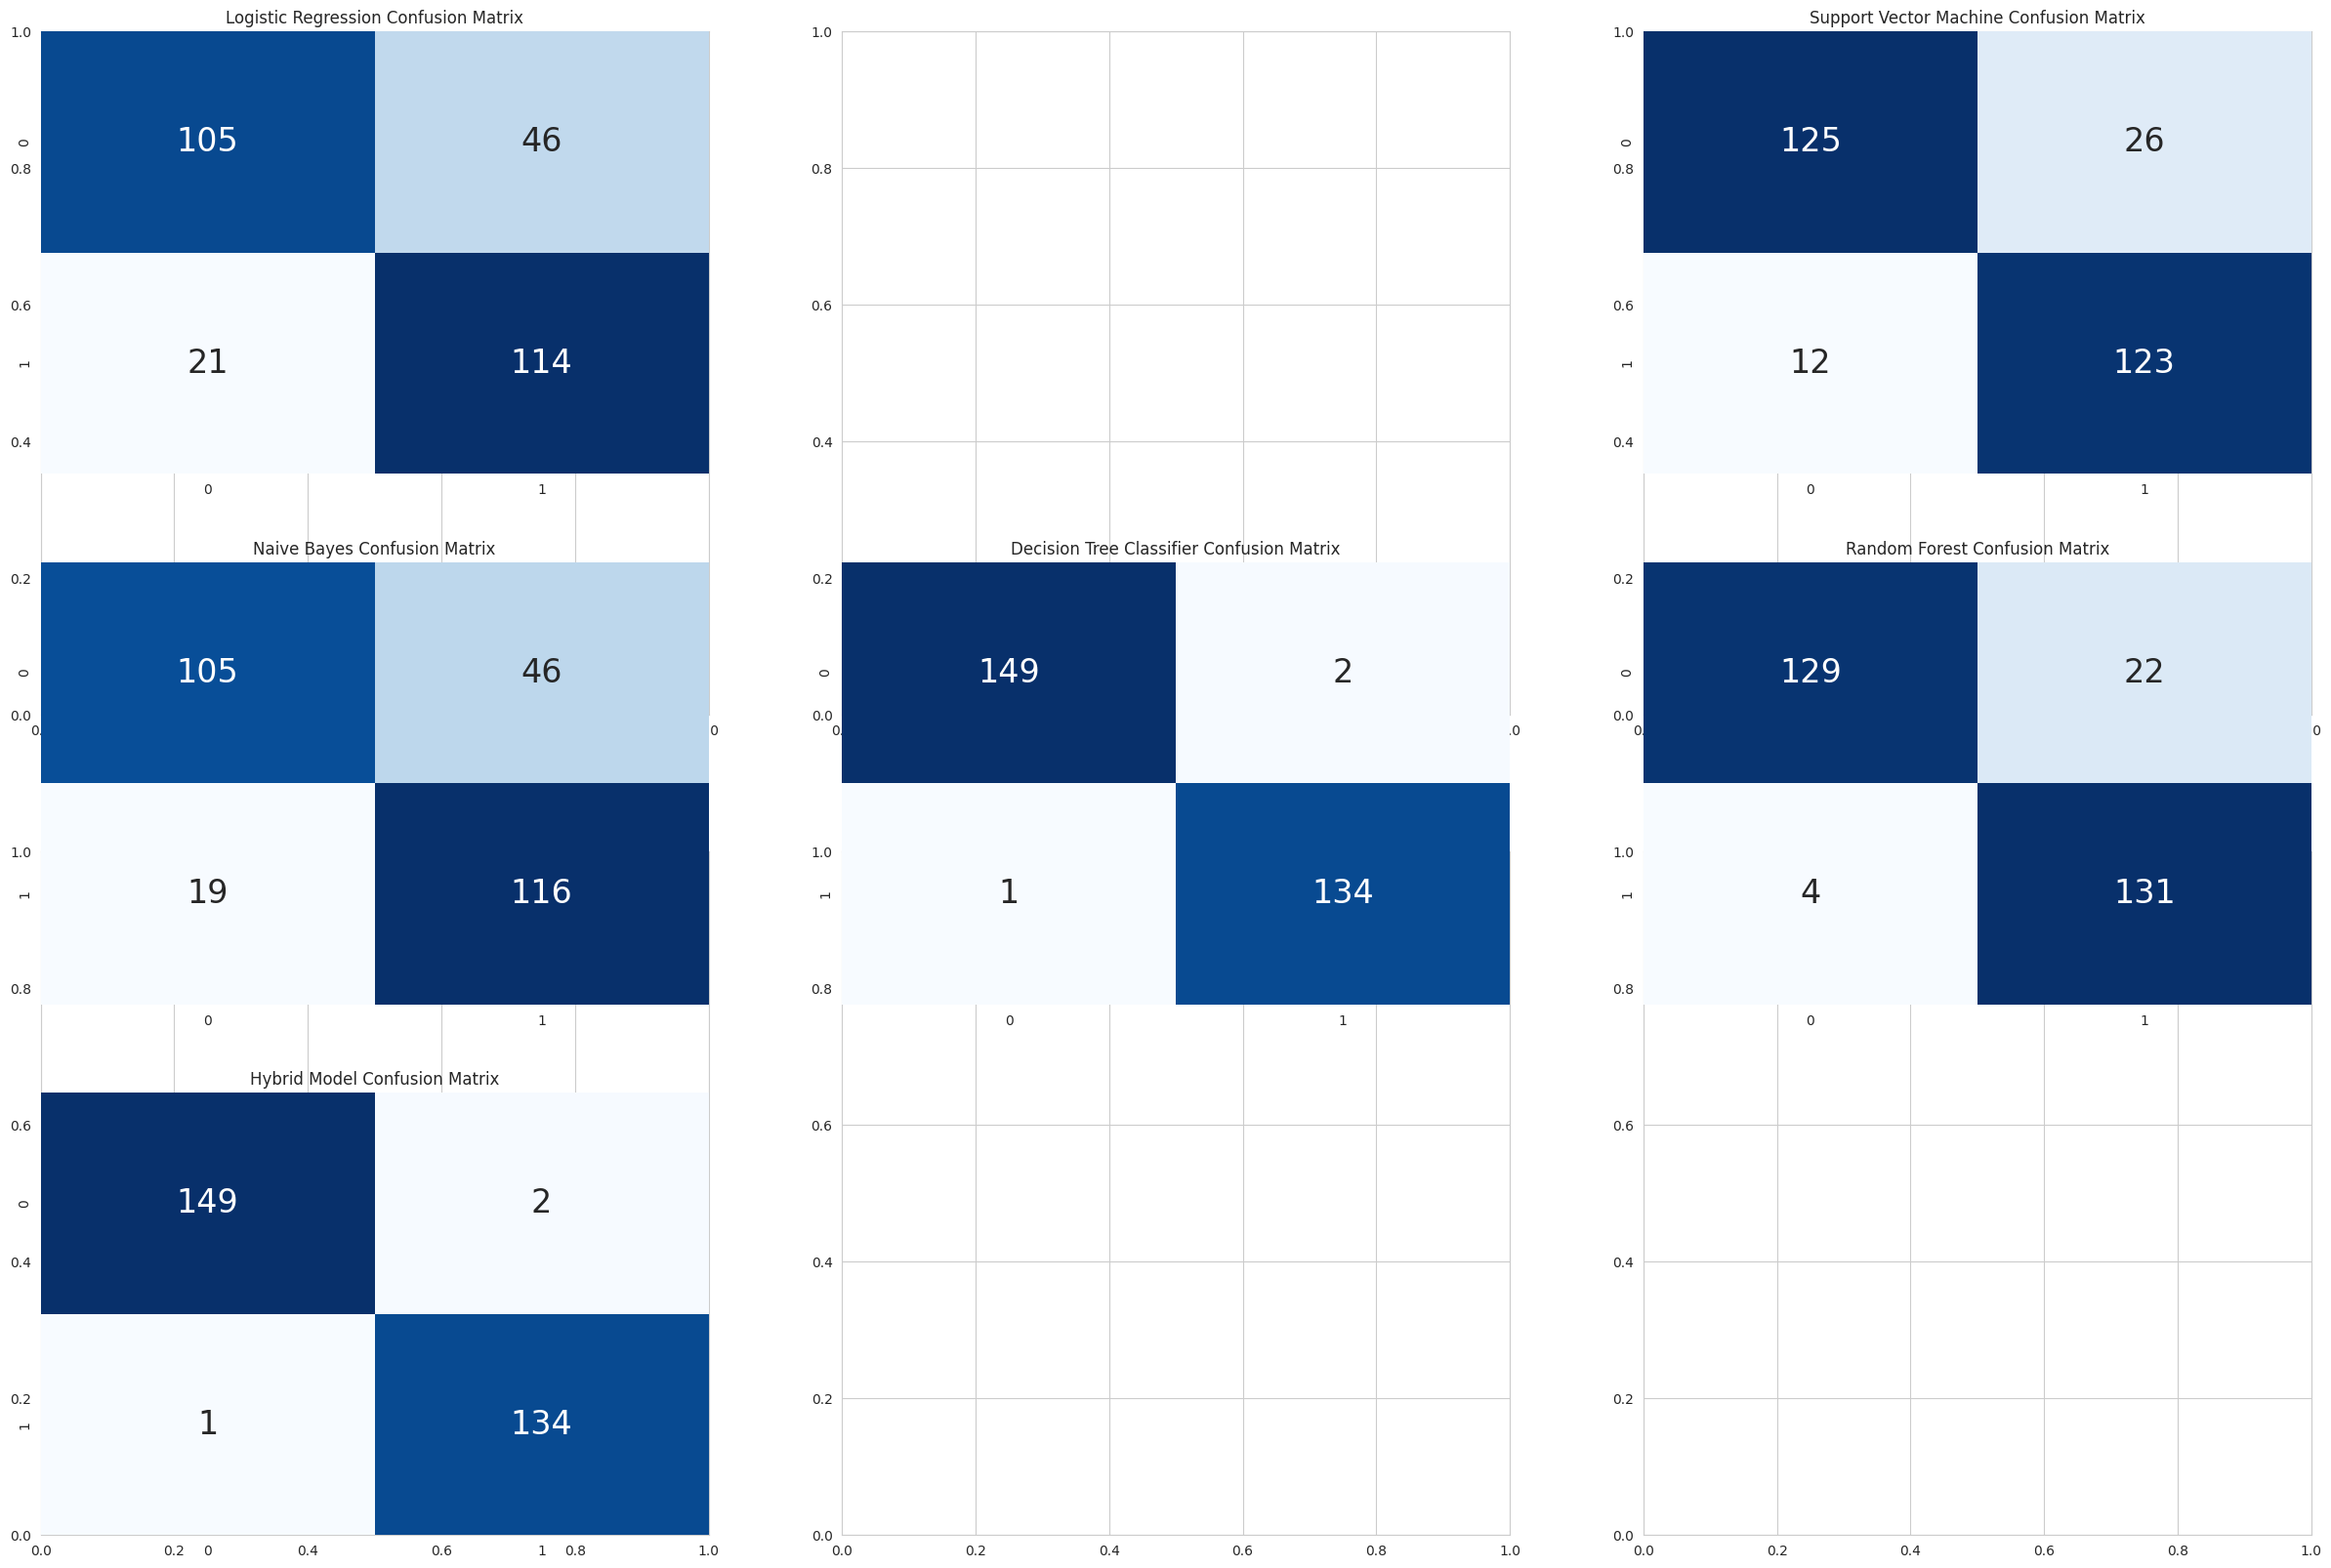

In [107]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots(figsize=(30,20), nrows=2, ncols=3)


plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_hd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Hybrid Model Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
